In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os

In [3]:
def extract_color_stats(image):
    (R, G, B) = image.split()
    features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),np.std(G), np.std(B)]

# return our set of features
    return features

In [28]:
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm": SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier()
    }

[INFO] extracting image features...
[INFO] evaluating...
                    precision    recall  f1-score   support

 coast_arnat59.jpg       0.00      0.00      0.00         0
 coast_art1130.jpg       0.00      0.00      0.00         0
  coast_art294.jpg       0.00      0.00      0.00         0
  coast_art487.jpg       0.00      0.00      0.00         1
    coast_bea1.jpg       0.00      0.00      0.00         0
   coast_bea10.jpg       0.00      0.00      0.00         1
   coast_bea14.jpg       0.00      0.00      0.00         0
    coast_bea2.jpg       0.00      0.00      0.00         1
   coast_bea20.jpg       0.00      0.00      0.00         0
   coast_bea24.jpg       0.00      0.00      0.00         1
   coast_bea26.jpg       0.00      0.00      0.00         0
   coast_bea27.jpg       0.00      0.00      0.00         0
   coast_bea29.jpg       0.00      0.00      0.00         1
    coast_bea3.jpg       0.00      0.00      0.00         1
   coast_bea30.jpg       0.00      0.00   

C:\Users\Aniket\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Aniket\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


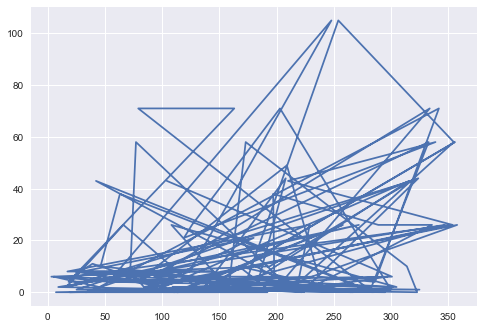

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [4]:
print("[INFO] extracting image features...")
import glob
imagePaths = glob.glob("C:/Users/Aniket/Desktop/New folder/python-machine-learning/3scenes/coast/*")


data = []
labels = []
for imagePath in imagePaths:
# load the input image from disk, compute color channel
# statistics, and then update our data list
    image = Image.open(imagePath)
    features = extract_color_stats(image)
    data.append(features)

# extract the class label from the file path and update the
# labels list
    label = imagePath.split(os.path.sep)[-1]
    labels.append(label)

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.33, random_state=42)

# train the model
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 30)
knn = KNeighborsClassifier(n_neighbors=30)

# fitting the model
knn.fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = knn.predict(testX)
print(classification_report(testY, predictions,
    target_names=le.classes_))



import seaborn as sb
import matplotlib.pyplot as plt
plt.plot(testY,predictions)
plt.show()

#print data[3]
print labels

In [16]:
import glob
imagePaths = glob.glob("C:/Users/Aniket/Desktop/jpg/*")
data = []
labels = []
l=[]
for imagePath in imagePaths:
    b={}
    image = Image.open(imagePath)
    features = extract_color_stats(image)
    b['f1']= features[0]
    b['f2']= features[1]
    b['f3']= features[2]
    b['f4']= features[3]
    b['f5']= features[4]
    b['f6']= features[5]
    
    data.append(features)

# extract the class label from the file path and update the
# labels list
    label = imagePath.split(os.path.sep)[-1]
    b['label']= label
    labels.append(label)
    
    l.append(b)
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)



In [18]:
import pandas as pd
df=pd.DataFrame(l)
print df
df.to_csv('output.csv')

              f1          f2          f3         f4         f5         f6  \
0     105.835754  115.290979  107.254294  57.521601  48.046751  50.967711   
1     153.586649  142.331051  118.780871  70.054591  67.187968  63.072567   
2      97.697045  127.784048  155.593351  30.178242  33.152066  39.979864   
3      72.314760   86.057341  104.658220  45.285544  49.755583  53.140008   
4     156.223893  160.034800  166.945488  47.985966  50.420138  53.044818   
5     156.710275  165.349339  174.296487  35.575630  36.494449  40.167852   
6     180.140347  179.960057  184.517528  38.568949  40.703154  43.698330   
7     105.618506  133.440341  153.857178  55.873979  42.039116  48.066909   
8      78.102737  131.722677  171.841192  33.548127  37.694538  36.362434   
9      97.539655   90.872087   50.739176  64.134634  56.198768  48.220389   
10    169.194412  177.565745  172.798029  47.182674  51.244771  55.002817   
11    168.380658  173.090797  169.925095  35.613740  37.906330  40.390157   

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

li = [6.30,2.50,5.0,1.9,250,650]

x = np.array(li)
pred = knn.predict([x])
print(pred)

0.0
[522]


In [8]:
from PIL import Image
import numpy as np
imagePath= "C:/Users/Aniket/Desktop/ani/0.jpg"
image = Image.open(imagePath)
features = extract_color_stats(image)
features

[107.8021,
 88.552875,
 49.981050000000003,
 71.823263192297247,
 63.042321532716215,
 39.817903522128077]